In [6]:
import pandas as pd

In [167]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') 

In [168]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [67]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

# df[['SEX', 'EDUCATION']].groupby('SEX').count()

len(
    df[
        df['SEX'].isin(['2']) & (df['EDUCATION'].isin(['2']))
    ].index
)

8656

In [159]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_

# df.groupby(check_columns(df.columns), axis=1).median()
# df.groupby('default.payment.next.month').BILL_AMT3.agg('median')
# df.groupby('default.payment.next.month').agg({'BILL_AMT3':'median','BILL_AMT4': 'median'})

def check_columns(s):
    a = []
    for col in s:
        if col.startswith('BILL') | col.startswith('PAY'):
            a.append(col)
    return a
    
# df.groupby('default.payment.next.month').agg({ check_columns: 'median'})

# df.groupby('default.payment.next.month').median()
df.groupby('default.payment.next.month').map(check_columns)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,15073.5,150000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,14758.5,90000.0,2.0,2.0,2.0,34.0,1.0,0.0,0.0,0.0,...,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [160]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table('SEX','EDUCATION','MARRIAGE')

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,1.500000,1.400000,NaN
1,1.750000,1.545943,1.613306,1.400000
2,1.833333,1.653610,1.581197,1.611111
3,1.727273,1.633695,1.531692,1.650485
4,NaN,1.653846,1.661765,1.666667
5,NaN,1.680000,1.637795,1.666667
6,NaN,1.500000,1.476190,2.000000


In [199]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

def check_limit(i):
    if i <= 10000:
        return 'A'
    elif 100000 >= i > 10000:
        return 'B'
    elif 200000 >= i > 100000:
        return 'C'
    elif 400000 >= i > 200000:
        return 'D'
    elif 700000 >= i > 400000:
        return 'E'
    elif i > 700000:
        return 'F'


df['RATE'] = df['LIMIT_BAL'].map(check_limit)
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,RATE
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B
5,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,B
6,7,500000.0,1,1,2,29,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,E
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,B
8,9,140000.0,2,3,1,28,0,0,2,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,C
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,B


In [203]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

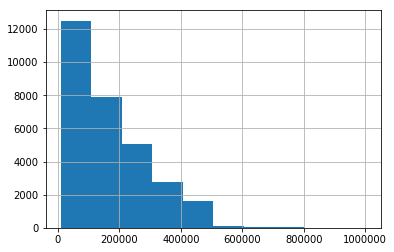

In [211]:
df['LIMIT_BAL'].hist()

In [ ]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
df #TODO

In [66]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

In [4]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO